## Combination Pulse testing

This part of the notebook is used for testing the CombinationPulse

In [1]:
# Initialize packages
import numpy as np
from matplotlib import pyplot as plt

import qcodes as qc
import silq
from silq.instrument_interfaces import Channel
from silq.pulses import SinePulse, TriggerPulse, PulseImplementation, PulseSequence, CombinationPulse, DCPulse, DCRampPulse, AWGPulse

%matplotlib notebook

pyqtgraph plotting not supported, try "from qcodes.plots.pyqtgraph import QtPlot" to see the full error


In [2]:
# create a SinePulse and a DCPulse that overlap, so we can add them into a combinationpulse
sine_pulse = SinePulse(name='sine', t_start=0, duration=10, 
                       frequency=250, power=1.5, phase=0, acquire=True)
dc_pulse = DCPulse(name='DC', t_start=3, t_stop=13, amplitude=1.0, acquire=True)
dc_pulse_2 = DCPulse(name='DC_2', t_start=5, t_stop=15, amplitude=1.0, acquire=True)

In [3]:
# make a combination of the two pulses
combination_pulse = sine_pulse * dc_pulse + dc_pulse_2

In [4]:
combination_pulse

CombinationPulse of: ((sine * DC) + DC_2) with
	 sine : SinePulse(sine, f=0.00 MHz, power=1.5, t_start=0, t_stop=10)
	 DC : DCPulse(DC, A=1.0, t_start=3, t_stop=13)
	 DC_2 : DCPulse(DC_2, A=1.0, t_start=5, t_stop=15)

<IPython.core.display.Javascript object>


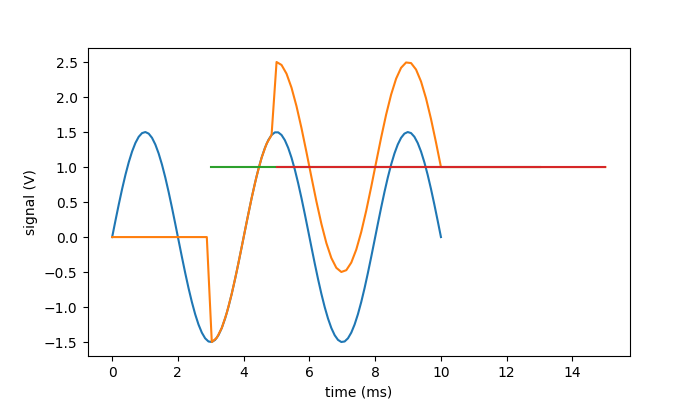

In [5]:
# add all three pulses to a pulse sequence
pulse_sequence = PulseSequence(pulses=[sine_pulse, dc_pulse, dc_pulse_2, combination_pulse])

# Plot pulses
plt.figure(figsize=(7,4))
plt.xlabel('time (ms)')
plt.ylabel('signal (V)')
for pulse in pulse_sequence:
    t_list = np.linspace(pulse.t_start, pulse.t_stop, 100) # ms
    voltages = pulse.get_voltage(t_list)
    plt.plot(t_list, voltages)

In [6]:
ramp = DCRampPulse(name='ramp', t_start=0, duration=10, amplitude_start=0.0, amplitude_stop=1.0)
sine_pulse = SinePulse(name='sine', t_start=0, duration=12, frequency=250, power=1.5, phase=0, acquire=True)
sine_ramp = sine_pulse * ramp

In [7]:
sine_ramp

CombinationPulse of: (sine * ramp) with
	 sine : SinePulse(sine, f=0.00 MHz, power=1.5, t_start=0, t_stop=12)
	 ramp : DCRampPulse(ramp, A_start=0.0, A_stop=1.0, t_start=0, t_stop=10)

<IPython.core.display.Javascript object>


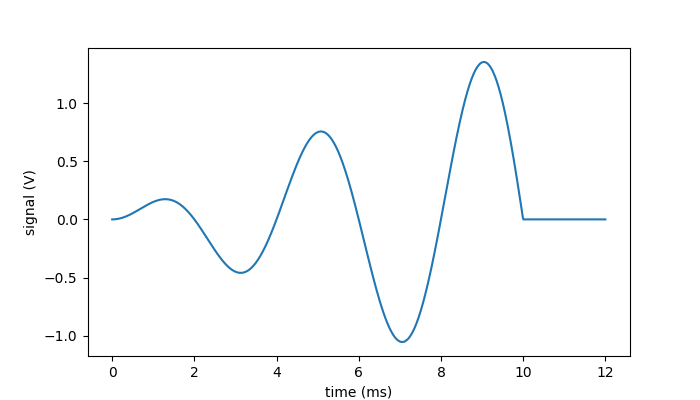

In [8]:
# Plot pulses
plt.figure(figsize=(7,4))
plt.xlabel('time (ms)')
plt.ylabel('signal (V)')
t_list = np.linspace(sine_ramp.t_start, sine_ramp.t_stop, 1000) # ms
voltages = sine_ramp.get_voltage(t_list)
plt.plot(t_list, voltages)
plt.show()

## AWG Pulse testing

This part of the notebook is used for testing the AWGPulse

In [9]:
# define a function to be used for calculating the waveform points of the AWGPulse
def arbFunc(t):
    return np.sin(np.cos(t**2))*t

In [10]:
awg_pulse = AWGPulse.from_function(name='awg_pulse', t_start=0, duration=10, function=arbFunc)

In [11]:
awg_pulse

AWGPulse(awg_pulse, function:<function arbFunc at 0x00000195C823C950>, t_start=0, t_stop=10)

<IPython.core.display.Javascript object>


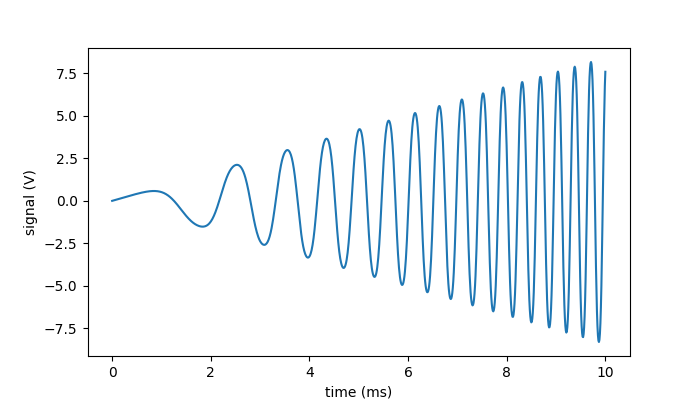

In [12]:
# Plot pulses
plt.figure(figsize=(7,4))
plt.xlabel('time (ms)')
plt.ylabel('signal (V)')
t_list = np.linspace(awg_pulse.t_start, awg_pulse.t_stop, 1000) # ms
voltages = awg_pulse.get_voltage(t_list)
plt.plot(t_list, voltages)
plt.show()

In [13]:
# now let's try loading an awg pulse from an array
awg_points = np.append(np.zeros(50),np.ones(50))
awg_points = np.append(awg_points,np.ones(50)*2)

awg_times = np.linspace(0, 10, 150)

awg_array = np.stack((awg_times, awg_points))

In [14]:
awg_pulse_2 = AWGPulse.from_array(name='awg_pulse_2', array=awg_array)

In [15]:
awg_pulse_2

AWGPulse(awg_pulse_2, array:(2, 150), t_start=0.0, t_stop=10.0)

<IPython.core.display.Javascript object>


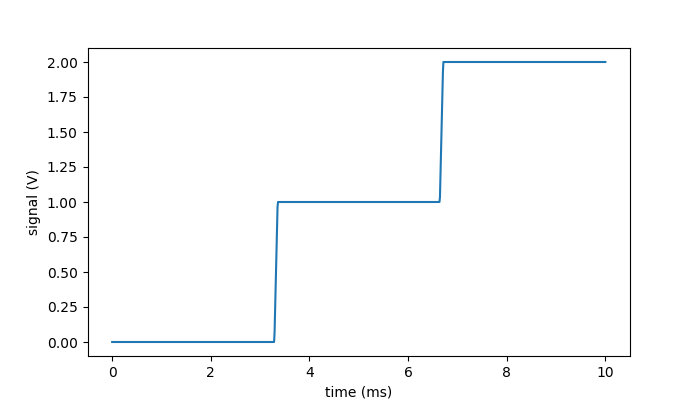

In [16]:
# Plot pulses
plt.figure(figsize=(7,4))
plt.xlabel('time (ms)')
plt.ylabel('signal (V)')
t_list = np.linspace(awg_pulse_2.t_start, awg_pulse_2.t_stop, 1000) # ms
voltages = awg_pulse_2.get_voltage(t_list)
plt.plot(t_list, voltages)
plt.show()

In [17]:
sine_pulse = SinePulse(name='sine', t_start=0, duration=10, frequency=5000, power=0.25, phase=0)

sine_step = sine_pulse*awg_pulse

sine_step

CombinationPulse of: (sine * awg_pulse) with
	 sine : SinePulse(sine, f=0.01 MHz, power=0.25, t_start=0, t_stop=10)
	 awg_pulse : AWGPulse(awg_pulse, function:<function arbFunc at 0x00000195C823C950>, t_start=0, t_stop=10)

<IPython.core.display.Javascript object>


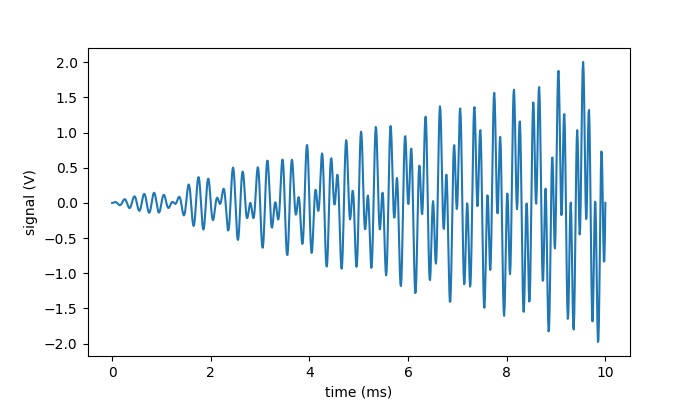

In [18]:
# Plot pulses
plt.figure(figsize=(7,4))
plt.xlabel('time (ms)')
plt.ylabel('signal (V)')
t_list = np.linspace(sine_step.t_start, sine_step.t_stop, 1000) # ms
voltages = sine_step.get_voltage(t_list)
plt.plot(t_list, voltages)
plt.show()

In [19]:
# awg pulse with interpolation disabled
awg_pulse_3 = AWGPulse.from_array(name='awg_pulse_3', array=awg_array, interpolate=False)

<IPython.core.display.Javascript object>


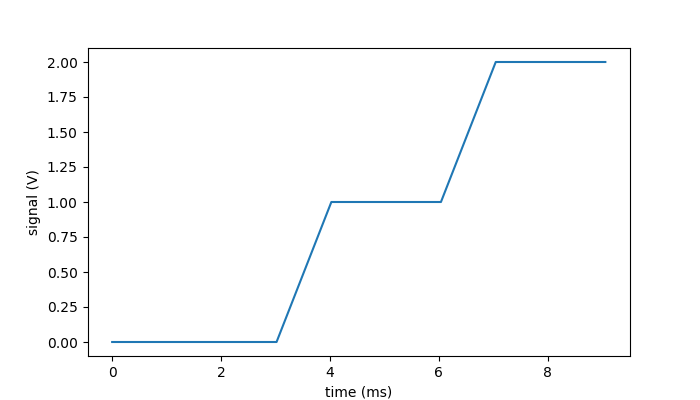

In [45]:
# Plot pulse
plt.figure(figsize=(7,4))
plt.xlabel('time (ms)')
plt.ylabel('signal (V)')
t_list = awg_times[::15]
voltages = awg_pulse_3.get_voltage(t_list)
plt.plot(t_list, voltages)
plt.show()